In [1]:
# imports
import numpy as np
import pandas as pd
import uproot
import os
from pprint import pprint
import pandas as pd
from hist import Hist
import hist

In [3]:
file_name = os.path.join("..", "Data", "Root_Files", "up6gev.root")

In [4]:
# Step by step getting EcalBarrel events
root_file = uproot.open(file_name)
events_tree = root_file['events']
ecal_branch = events_tree['EcalBarrelHits']

# Shortcut to opening the events (remove the above line in production)
ecal_branch = uproot.open(file_name)['/events/EcalBarrelHits']
pprint(ecal_branch.keys())

['EcalBarrelHits.cellID',
 'EcalBarrelHits.energy',
 'EcalBarrelHits.position.x',
 'EcalBarrelHits.position.y',
 'EcalBarrelHits.position.z',
 'EcalBarrelHits.contributions_begin',
 'EcalBarrelHits.contributions_end']


In [5]:
branches ={
    "id": "EcalBarrelHits.cellID",
    "x": "EcalBarrelHits.position.x",
    "y": "EcalBarrelHits.position.y",
    "z": "EcalBarrelHits.position.z",
    "energy": "EcalBarrelHits.energy"
}

In [6]:
ecal_events = ecal_branch.arrays(branches.keys(), aliases=branches, entry_start=0, entry_stop=20)

for event in ecal_events:
    # if not len(event['id']):
    #     continue
    print(event)

... 0.00018, 0.000147, 3.93e-05, 2.5e-05, 5.19e-05, 2.38e-06, 3.96e-06, 1.12e-10]}
... 3.06e-11, 0.000199, 0.000152, 0.000142, 0.000153, 0.000227, 0.000202, 7.6e-05]}
... 3, 3.5], energy: [0.000233, 0.00015, 0.000122, 0.000203, 0.000128, 0.000145]}
... 0, 0, 0], energy: [0.00013, 0.000148, 0.000158, 0.000167, 0.000121, 0.000213]}
... 0.000203, 0.000135, 0.000144, 2.3e-06, 0.000322, 0.000266, 0.000206, 0.000161]}
... 0, 0], energy: [0.000224, 0.000187, 0.000156, 0.00014, 0.000356, 0.000154]}
... 0, 0, 0], energy: [0.000165, 0.000253, 0.000168, 0.000327, 0.00017, 0.000137]}
... 0, 0, 0], energy: [0.000147, 0.000198, 0.000164, 0.000161, 0.000142, 0.00014]}
... 0.000413, 0.000174, 0.000116, 0.000125, 0.000256, 0.000707, 0.00032, 0.00112]}
... 0.000429, 6.82e-05, 0.000599, 0.000853, 0.00216, 8.29e-05, 9.49e-05, 0.000226]}
... -2], energy: [0.000148, 0.000226, 0.000143, 0.000177, 0.000145, 0.000145]}
... 0.000163, 0.000143, 0.000201, 0.000177, 1.4e-05, 6.94e-09, 2.28e-07, 1.81e-05]}
... -0.5

In [7]:
def decode_id(id):
    # <id>system:8,module:8,layer:8,slice:8,x:32:-16,y:-16</id>

    # 1 500 422  = 0x16E506 = 0x16 0xE5 0x06
    # 0x16 0xE5 0x06  ||  0x06 0xE5 0x16

    # our id (ALL values in HEX below)
    # FF B9 FF 91 01 03 0A 65
    # 
    # system =  FF B9 FF 91 01 03 0A 65   &   00 00 00 00 00 00 00 FF = 65
    # module
    # FF B9 FF 91 01 03 0A 65 >> 8  =  00 FF B9 FF 91 01 03 0A
    # module = 00 FF B9 FF 91 01 03 0A   &   00 00 00 00 00 00 00 FF = 0A
    
    system = id & 0xFF
    module = (id >> 8) & 0xFF
    layer = (id >> 16) & 0xFF
    slice = (id >> 24) & 0xFF
    x = np.int16((id >> 32) & 0xFFFF)
    y = np.int16((id >> 48) & 0xFFFF)    
    
    return system, module, layer, slice, x, y

# Now run loop and decode values
ecal_events = ecal_branch.arrays(branches.keys(), aliases=branches, entry_start=0, entry_stop=50)

for event in ecal_events:
    ids = event['id']
    delta_energies = event['energy']

    # Skip empty events
    if not len(ids):
        continue

    #print("==== Event =====")

    for id, de in zip(ids, delta_energies):
        system, module, layer, slice, module_x, module_y = decode_id(id)
        print(f"system={system} module={module} layer={layer}, slice={slice}, module_x={module_x}, module_y={module_y}, delta_energies={delta_energies}")

system=101 module=11 layer=1, slice=1, module_x=158, module_y=719, delta_energies=[0.000148, 0.000145, 0.000168, 0.000147, ... 5.19e-05, 2.38e-06, 3.96e-06, 1.12e-10]
system=101 module=11 layer=2, slice=1, module_x=167, module_y=719, delta_energies=[0.000148, 0.000145, 0.000168, 0.000147, ... 5.19e-05, 2.38e-06, 3.96e-06, 1.12e-10]
system=101 module=11 layer=3, slice=1, module_x=176, module_y=719, delta_energies=[0.000148, 0.000145, 0.000168, 0.000147, ... 5.19e-05, 2.38e-06, 3.96e-06, 1.12e-10]
system=101 module=11 layer=4, slice=1, module_x=186, module_y=719, delta_energies=[0.000148, 0.000145, 0.000168, 0.000147, ... 5.19e-05, 2.38e-06, 3.96e-06, 1.12e-10]
system=101 module=11 layer=5, slice=1, module_x=195, module_y=720, delta_energies=[0.000148, 0.000145, 0.000168, 0.000147, ... 5.19e-05, 2.38e-06, 3.96e-06, 1.12e-10]
system=101 module=11 layer=6, slice=1, module_x=205, module_y=720, delta_energies=[0.000148, 0.000145, 0.000168, 0.000147, ... 5.19e-05, 2.38e-06, 3.96e-06, 1.12e-10

In [8]:
# Now run loop and decode values
ecal_events = ecal_branch.arrays(branches.keys(), aliases=branches, entry_start=0, entry_stop=5000)

df = pd.DataFrame({
    "evt": pd.Series(dtype='int'),
    "module": pd.Series(dtype='int'),
    "layer": pd.Series(dtype='int'),
    "slice": pd.Series(dtype='int'),
    "gx": pd.Series(dtype='int'),
    "gy": pd.Series(dtype='int'),
    "x": pd.Series(dtype='float'),
    "y": pd.Series(dtype='float'),
    "z": pd.Series(dtype='float'),
    "energy": pd.Series(dtype='float')
})


print(df)
for event_id, event in enumerate(ecal_events):
    ids = event['id']
    delta_energies = event['energy']
    true_x = event['x']
    true_y = event['y']
    true_z = event['z']

    # Skip empty events
    if len(ids) < 1:
        continue

    #print("==== Event =====")

    for id, x, y, z, energy in zip(ids, true_x, true_y, true_z, delta_energies):
        system, module, layer, slice, grid_x, grid_y = decode_id(id)
        #print(f"evt={event_id} system={system} module={module} layer={layer}, slice={slice}, grid_x={grid_x}, grid_y={grid_y}, delta_energies={delta_energies}")
        
        # append data frame
        df.loc[len(df)] = [event_id, module, layer, slice, grid_x, grid_y, x, y, z, energy]

Empty DataFrame
Columns: [evt, module, layer, slice, gx, gy, x, y, z, energy]
Index: []


In [9]:
# Save dataframe
df.to_pickle("hits_temp_df.pkl")
df

,evt,module,layer,slice,gx,gy,x,y,z,energy
0,0.0,11.0,1.0,1.0,158.0,719.0,1030.250000,79.000000,-0.5,1.483197e-04
1,0.0,11.0,2.0,1.0,167.0,719.0,1058.260010,83.500000,-0.5,1.449656e-04
2,0.0,11.0,3.0,1.0,176.0,719.0,1086.270020,88.000000,-0.5,1.684064e-04
3,0.0,11.0,4.0,1.0,186.0,719.0,1114.280029,93.000000,-0.5,1.469930e-04
4,0.0,11.0,5.0,1.0,195.0,720.0,1142.290039,97.500000,0.0,1.955251e-04
...,...,...,...,...,...,...,...,...,...,...
28607,999.0,11.0,3.0,1.0,177.0,719.0,1086.270020,88.500000,-0.5,1.596499e-04
28608,999.0,11.0,4.0,1.0,187.0,719.0,1114.280029,93.500000,-0.5,1.513078e-04
28609,999.0,11.0,5.0,1.0,197.0,719.0,1142.290039,98.500000,-0.5,1.722385e-04
28610,999.0,11.0,6.0,1.0,207.0,719.0,1170.300049,103.500000,-0.5,1.434107e-04


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f4f4342c1c0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f4f4342c610>, text=[])

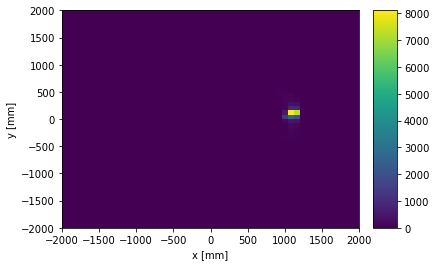

In [10]:
hist_xy = Hist(
    hist.axis.Regular(50, -2000, 2000, name="x", label="x [mm]", flow=False),
    hist.axis.Regular(50, -2000, 2000, name="y", label="y [mm]", flow=False),
)
hist_xy.fill(df.x, df.y)
hist_xy.plot2d()

<AxesSubplot:xlabel='x', ylabel='y'>

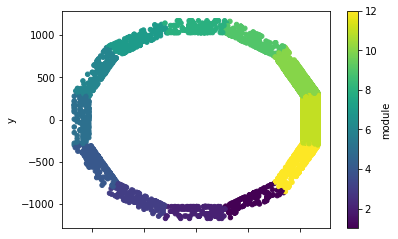

In [11]:
df.plot.scatter(x='x', y='y', c='module', colormap='viridis')

In [12]:
#How many hits we have in each module? 

print("hits per module")
for module, group in df.groupby('module'):
    print(f"module={int(module)}     Nhits ={len(group)}")

hits per module
module=1     Nhits =151
module=2     Nhits =141
module=3     Nhits =162
module=4     Nhits =152
module=5     Nhits =157
module=6     Nhits =179
module=7     Nhits =177
module=8     Nhits =179
module=9     Nhits =217
module=10     Nhits =957
module=11     Nhits =25825
module=12     Nhits =315


<AxesSubplot:xlabel='x', ylabel='y'>

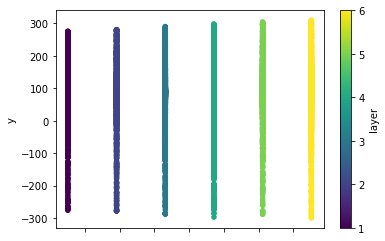

In [13]:
mask = df.module == 11
df[mask].plot.scatter(x='x', y='y', c='layer', colormap='viridis')
